### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2017 ###

# Obstacle and Collision Avoidance Hovercraft Swarm system #

#### Rahul Singh (rsingh53@wisc.edu), Karan Talreja (talreja2@wisc.edu), and Heemanshu Suri (hsuri@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)
1. [Appendix](#6.-Appendix)

## 1. Introduction ##

With advances in robotics and immense focus on automation, dissemination of drones and robots in daily life in coming years is inevitable. Clearly, motion planning and navigation of unmanned aerial vehicles are areas of tremendous interest among researchers and scientists these days.

As a part of CS524 project, we aim to plan a tranjectory for hovercraft(s) from source to destination. While traversing from source to destination we aim to make hovercraft(s) visit pre-determined positions, avoid stationary and moving obstacles, and minimize thrust.

Building upon 2-D hovercraft problem discussed in class, we have solved the obstacle avoidance$^{[1]}$ and collision avoidance problems. We started with the standard 2-D hovercraft problem in which a hovercraft travels from source (point $A$) to destination (point $B$), visiting the waypoints ( points $W_1, W_2, W_3, \dots $ ) in between while minimizing thrust. As an extension to this problem, we introduced stationary obstacles in the path of hovercraft. Stationary obstacles are in the form of a 2-D rectangular area. If hovercraft enters the obstacle region, we consider it a hovercraft crash and an infeasible trajectory.

In more realistic settings, there are not only stationary obstacles but moving obstacles too. Consider the problem of trajectory optimization of a swarm of hovercrafts. To simulate more realistic scenario of moving obstacles, we have solved the above stated problem for multiple hovercrafts in which each hovercraft acts as moving obstacle for all other hovercrafts. In other words, there can not be two (or more) hovercrafts at the same location at the same time.

This project can serve as foundation for motion planning of drones and robots where the swarm is given the task to reach destination visiting some points in between while avoiding obstacles and collision. A real-life example is drone delivery of a large customer order from Amazon. Multiple drones fly from point $A$ to point $B$ while avoiding stationary obstacles such as buildings (while flying low or running on ground), and also avoiding collision from other drones.

We achieved these goals in different stages as shown in "Solution" section and are using synthetically generated data in our implementation. We have drawn plots to verify that hovercrafts are not colliding with either stationary or moving obstacles.

Rest of this project report is organized as follows: Section-2 talks about the mathematical models we used to solve above stated problems. Section-3 shows different stages of solution. We have implemented the solution in incremental fashion i.e. without any obstacle, with stationary obstacles, and with moving obstacles. We have implemented least-square (L-2) tradeoff between getting a trajectory which minimizes thrust and a trajectory which minimizes the error in visiting waypoints. Section-4 discusses results and plots various graphs which describe how the model scales when changing the number of obstacles, hovercrafts and waypoints. A pareto optimal curve is also discussed for a standard obstacle grid setting. It also tells various properties of the mathematical model and its limitations. Finally, we conclude with Section-5 talking about future extensions of our model.

## 2. Mathematical model ##

The variables and parameters used in the models are as described below

\begin{aligned}
\quad& \qquad x_{i,j,k} \qquad \text{ is position of hovercraft k at time j in dimension-axis i}\\
\quad& \qquad v_{i,j,k} \qquad \text{ is velocity of hovercraft k at time j in dimension-axis i}\\
\quad& \qquad u_{i,j,k} \qquad \text{ is thrust of hovercraft k at time j in dimension-axis i}\\
\quad& \qquad xo_{i,o} \qquad \text{ is position of obstacle o in dimension-axis i}\\
\quad& \qquad bbo_{i,o} \qquad \text{ is bounding box of obstacle o in dimension-axis i}\\
\quad& \qquad v_{Max} \qquad \text{ is square of maximum resultant velocity of hovercraft}\\
\quad& \qquad n_d \qquad \text{ is number of dimensions, in our project nd = 2}\\
\quad& \qquad n_w \qquad \text{ is number of waypoints}\\
\quad& \qquad n_h \qquad \text{ is number of hovercrafts}\\
\quad& \qquad n_o \qquad \text{ is number of obstacles}\\
\quad& \qquad T_i \qquad \text{ is time at which hovercraft is at waypoint } w_i\\
\quad& \qquad obstacle_{o,j,k,l} \qquad \text{ is binary variable associated with j boundary for obstacle o at time k and hovercraft l} \\
\quad& \qquad obstacleS_{o,j,k,l} \qquad \text{ is binary variable associated with o boundary for collision avoidance at time j between hovercraft k and l} \\
\quad& \qquad \lambda \qquad \text{ is the regularization parameter }\\
\end{aligned}

The objective function of the model is a trade-off between a trajectory that minimized thrust and a trajectory which visits all the waypoints as closely as possible. The mathematical expression is written as follows

\begin{aligned}
\qquad& \sum_{i=1}^{n_d}  \sum_{j=1}^{T_{n_w}} \sum_{k=1}^{n_h} \|{u_{i,j,k}}^2\| + \lambda \sum_{i=1}^{n_d}  \sum_{j=1}^{n_w} \sum_{k=1}^{n_h}\| (x_{i, T_j, k} - w_{i,j,k})^2 \|
\end{aligned}


The mathematical model is developed in three sections below. Section 2A discusses the constraints on hovercraft dynamics and objective function required. Subsequently Section 2B develops obstacle avoidance constraints. Further Section 2C develops collision avoidance constraints. Section 2D shows the final model with all its constraints in standard form.


### 2A. Hovercraft Model
The constraints which define the hovercraft dynamics are as follows. The first constraint specifies that the change in resulting position of the hovercraft should be equal to the velocity at that instant. Second constraint specifies that the change in the resulting velocity should be equal to the thruster input at that instant.

\begin{aligned}
\quad& x_{i, j+1, k} = x_{i,j,k} + v_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\}, \; \forall j \in \{1,\dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}\\
\quad& v_{i, j+1, k } = v_{i,j,k} + u_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\} , \; \forall j \in \{1,\dots, T_{n_w}\} , \; \forall k \in \{1,\dots, n_h\} \\
\end{aligned}

The constraint to limit the maximum velocity of the hovercraft is as mentioned below. This constraint is added so that the hovercraft trajectory thus generated by the model doesn't contain an instance in which the hovercrafts jumps over the obstacle. If the maximum velocity is large enough than a trajectory can be generated in which the hovercraft ignores the obstacle constraints and just jumps over the obstacle.

\begin{aligned}
\quad& \sum_{i=1}^{n_d} v_{i, j, k }^2 \le v_{Max} \quad& \forall j \in \{1,\dots, T_{n_w}\} , \; \forall k \in \{1,\dots, n_h\} \\
\end{aligned}

The initial constraint on the system to start from rest is as defined below.

\begin{aligned}
\quad& v_{i, 1, k } = 0 \quad& \forall i \in \{1, \dots, n_d\}, \; \forall k \in \{1,\dots, n_h\}
\end{aligned}

The constraint for the hovercraft to visit the first and last waypoint at the specified time is as mentioned below

\begin{aligned}
\quad& x_{i, T_j, k } = w_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\} , \; \forall j \in \{1, n_w\} , \; \forall k \in \{1,\dots, n_h\} \\
\end{aligned}

### 2B. Obstacle Avoidance
This section describes constraints to avoid stationary obstacles. Stationary obstacle can be any convex polygon, however for our implementation we chose to define stationary obstacle as a rectangular box. In 2-D plane, an obstacle is represented as ($xo_{1,o}, xo_{2,o}$) where o represents obstacle number. A hovercraft is said to be in an invalid state if it satisfies all of the below equations. Eq (1) and (3) limit the position of the hovercraft within $(xo_{1,o} - bbo_{1,o})$ and $( xo_{1,o} + bbo_{1,o}) $. While Eq (2) and (4) limit the position of the hovercraft within $(xo_{2,o} - bbo_{2,o})$ and $(xo_{2,o} + bbo_{2,o}) $.

$$
\begin{aligned}
\qquad& x_{1,j,k} ≤ xo_{1,o} - bbo_{1,o} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (1) \\
\qquad& x_{2,j,k} ≤ xo_{2,o} - bbo_{2,o} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (2) \\
\qquad& -x_{1,j,k} ≤ -(xo_{1,o} + bbo_{1,o}) \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\}  && (3) \\ 
\qquad& -x_{2,j,k} ≤ -(xo_{2,o} + bbo_{2,o}) \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\}  && (4) \\
\end{aligned}
$$

With definition of obstacle from eq. (1), (2), (3), and (4), we can safely state that if a point ($x_{1,j,k}, x_{2,j,k}$) breaks any of the above four constraint, it will be outside the obstacle region. In other words, a hovercraft will not be in an invalid state as long as it is satisfying three or lesser number of constraints (1) to (4).

To apply the above restriction, we transformed these constraints into *Mixed-Integer* form by adding a binary variable $obstacle$. Let M be a number larger than the maximum possible value of x or y for any hovercraft, then we can represent the restriction stated in above paragraph as follows:

$$
\begin{aligned}
x_{1,j,k} ≤ xo_{1,o} - bbo_{1,o} + M*obstacle_{o,1,j,k} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\}  && (5) \\ 
-x_{1,j,k} ≤ -(xo_{1,o} + bbo_{1,o}) + M*obstacle_{o,2,j,k} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (6) \\
x_{2,j,k} ≤ xo_{2,o} - bbo_{2,o} + M*obstacle_{o,3,j,k}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (7) \\
-x_{2,j,k} ≤ -(xo_{2,o} + bbo_{2,o}) + M*obstacle_{o,4,j,k}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (8) \\
obstacle_{o,i,j,k} \in \{0,1\}  \quad&  \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (9) \\
\sum_{i=1}^{4} obstacle_{o,i,j,k} \le 3  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} && (10)
\end{aligned}
$$

The Eqn (10) imposes the logical constraint that no more than 3 equations from (5), (6), (7) and (8) should have their $obstacle$ binary variable set to 1. Here having the binary variable equal to 1 means that the corresponding constraint is relaxed. If all 4 constraints are relaxed the hovercraft is in an invalid state. Having no more than 3 constraints relaxed guarantees the fact that the hovercraft will be outside the obstacle.

### 2C. Collision Avoidance
This section describes constraints to avoid collision of a hovercraft with another hovercraft. In this, every two hovercrafts should be at some distance (more than minimum safe distance) from each other at any time. The minimum safe distance should be decided in every direction and can be different in different directions. For simplicity, we have kept minimum safe distance same in every direction. Let $d$ be the distance between hovercraft $n_1$ and $n_2$ along any dimension. 

Similar to section 2B, we transformed these constraints into *Mixed-Integer* form by adding a binary variable obstacleS. Let M be a number larger than the maximum possible value of x or y for any hovercraft, then we can represent the collision avoidance constraints which need to be followed are stated as follows:

$$
\begin{aligned}
x_{1,j,n_1} ≤ x_{1,j,n_2} - d + M*obstacleS_{1,j,n_1,n_2} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\}  && (11) \\ 
-x_{1,j,n_1} ≤ -(x_{1,j,n_2} + d) + M*obstacleS_{2,j,n_1,n_2} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} && (12) \\
x_{2,j,n_1} ≤ x_{2,j,n_2} - d + M*obstacleS_{3,j,n_1,n_2}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} && (13) \\
-x_{2,j,n_1} ≤ -(x_{2,j,n_2} + d) + M*obstacleS_{4,j,n_1,n_2}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} && (14) \\
obstacleS_{i,j,n_1,n_2} \in \{0,1\}  \quad&  \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} && (15) \\
\sum_{i=1}^{4} obstacleS_{i,j,n_1,n_2} \le 3  \quad& \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} && (16)
\end{aligned}
$$

### 2D. Optimization Model in Standard Form
Hence, the final optimization model in standard form is written as below:

$$
\begin{aligned}
\underset{\mathbf{x_{i,j,k},v_{i,j,k},u_{i,j,k}} \in \mathbb{R^2}}{\text{Minimize}}\qquad& \sum_{i=1}^{n_d}  \sum_{j=1}^{T_{n_w}} \sum_{k=1}^{n_h} \|{u_{i,j,k}}^2\| + \lambda \sum_{i=1}^{n_d}  \sum_{j=1}^{n_w} \sum_{k=1}^{n_h}\| (x_{i, T_j, k} - w_{i,j,k})^2 \| \\
\text{subject to:}
\quad& x_{i, j+1, k} = x_{i,j,k} + v_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\}, \; \forall j \in \{1,\dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}\\
\quad& v_{i, j+1, k } = v_{i,j,k} + u_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\} , \; \forall j \in \{1,\dots, T_{n_w}\} , \; \forall k \in \{1,\dots, n_h\} \\
\quad& \sum_{i=1}^{n_d} v_{i, j, k }^2 \le v_{Max} \quad& \forall j \in \{1,\dots, T_{n_w}\} , \; \forall k \in \{1,\dots, n_h\} \\
\quad& x_{i, T_j, k } = w_{i,j,k} \quad& \forall i \in \{1, \dots, n_d\} , \; \forall j \in \{1, n_w\} , \; \forall k \in \{1,\dots, n_h\} \\
\quad& v_{i, 1, k } = 0 \quad& \forall i \in \{1, \dots, n_d\}, \; \forall k \in \{1,\dots, n_h\} \\
\quad& x_{1,j,k} ≤ xo_{1,o} - bbo_{1,o} + M*obstacle_{o,1,j,k} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} \\
\quad& -x_{1,j,k} ≤ -(xo_{1,o} + bbo_{1,o}) + M*obstacle_{o,2,j,k} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} \\
\quad& x_{2,j,k} ≤ xo_{2,o} - bbo_{2,o} + M*obstacle_{o,3,j,k}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} \\
\quad& -x_{2,j,k} ≤ -(xo_{2,o} + bbo_{2,o}) + M*obstacle_{o,4,j,k}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} \\
\quad& obstacle_{o,i,j,k} \in \{0,1\}  \quad&  \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \\
\quad& \quad& \; \forall o \in \{1,\dots, n_o\}\\
\quad& \sum_{i=1}^{4} obstacle_{o,i,j,k} \le 3  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall k \in \{1,\dots, n_h\}, \; \forall o \in \{1,\dots, n_o\} \\
\quad& x_{1,j,n_1} ≤ x_{1,j,n_2} - d + M*obstacleS_{1,j,n_1,n_2} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} \\
\quad& -x_{1,j,n_1} ≤ -(x_{1,j,n_2} + d) + M*obstacleS_{2,j,n_1,n_2} \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\} \\
\quad& x_{2,j,n_1} ≤ x_{2,j,n_2} - d + M*obstacleS_{3,j,n_1,n_2}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\}\\
\quad& -x_{2,j,n_1} ≤ -(x_{2,j,n_2} + d) + M*obstacleS_{4,j,n_1,n_2}  \quad& \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \; \forall n_2 \in \{1,\dots, n_h\}\\
\quad& obstacleS_{i,j,n_1,n_2} \in \{0,1\}  \quad&  \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\}, \\
\quad& \quad& \forall n_2 \in \{1,\dots, n_h\}\\
\quad& \sum_{i=1}^{4} obstacleS_{i,j,n_1,n_2} \le 3  \quad& \forall i \in \{1, \dots, 4\},  \forall j \in \{1, \dots, T_{n_w}\}, \; \forall n_1 \in \{1,\dots, n_h\},\\
\quad& \quad& \forall n_2 \in \{1,\dots, n_h\}\\
\end{aligned}
$$

Looking at the complete model, we can state that the problem is solved by __Mixed Integer Programming__ based model.

## 3. Solution
This section implements the solution in three sub sections. The first section gives a JuMP model. The second section is for plotting. The third section contains sample input parameters for the problem to be solved using the model.

### Main Model

The code below consists of our main model function.

In [1]:
using JuMP, Gurobi

##########################################################
# Function that solves the hovercraft's maze problem
# Arguments:
#   numWayPoints: number of way points in our setting
#   numHoverCrafts: total number of hovercrafts used
#   numObstacles:  number of obstacles in our setting
#   A: matrix to represent four boundary conditions for collision avoidance
#   bo: b vector for the vectorized constraints Ax - b <= obstacles
#   inputWayPoints: coordinates of the given way points
#   avoidObstacles: boolean variable which tells if our model needs to avoid collision with obstacles
#   avoidHoverCraftsCollision: boolean variable which tells if our model needs to avoid collision with
#   other hovercrafts
#   lambda: regularization parameter for optimal fuel cost vs hitting each way point
#
# Outputs:
#   xopt: vector of optimal trajectories of each hovercraft
#   uopt: vector of optimal thrust for each hovercraft at each time instant
#   objective value of the model
#   J1: optimal thrust value
#   J2: optimal waypoint mismatch
##########################################################
function solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, avoidObstacles
    , avoidHoverCraftsCollision, lambda)
    
    m = Model(solver = GurobiSolver(OutputFlag=0))

    # Variable for resulting position for each hovercraft
    @variable(m, x[1:2,1:T[numWayPoints],1:numHoverCrafts])

    # Variable for resulting velocity for each hovercraft
    @variable(m, v[1:2,1:T[numWayPoints],1:numHoverCrafts])

    # Variable for thruster input for each hovercraft
    @variable(m, u[1:2,1:T[numWayPoints],1:numHoverCrafts])

    # Binary variables for logical constraints to be imposed to implement
    # static obstacle avoidance. This is a four dimensional variable where
    # first dimension: number of obstacles
    # second dimension: 1 each for x_min, x_max, y_min and y_max for an obstacle
    # third dimension: Number of time steps.
    # fourth dimension: Number of hovercrafts
    @variable(m, obstacle[1:numObstacles,1:4,1:T[numWayPoints],1:numHoverCrafts], Bin)

    # Binary variables for logical constraints to be imposed to implement
    # collision avoidance between hovercrafts. This is a four dimensional variable where
    # first dimension: 1 each for x_min, x_max, y_min and y_max for an obstacle
    # second dimension: Number of time steps.
    # third dimension: Number of hovercrafts.
    # fourth dimension: Number of hovercrafts.
    @variable(m, obstacleS[1:4,1:T[numWayPoints],1:numHoverCrafts,1:numHoverCrafts], Bin)
    
    vMax = 1
    
    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, v[:,1,:] .== [0;0])

    # Simple linear model of hovercraft dynamics imposed on each timestep.
    # Change in resulting position should be equal to the velocity at that instant.
    # Change in resulting velocity should be equal to the thruster input at that instant.
    for t in 1:T[numWayPoints]-1
        @constraint(m, x[:,t+1,:] .== x[:,t,:] + v[:,t,:])
        @constraint(m, v[:,t+1,:] .== v[:,t,:] + u[:,t,:])
    end

    # Constraint on each hovercraft for each time step to be in the maximum velocity
    # limit.
    for n in 1:numHoverCrafts
        for t in 1:T[numWayPoints]
            @constraint(m, sum(v[:,t,n].^2) <= vMax)
        end
    end
    
    # hit all the waypoints
    for n in 1:numHoverCrafts
        for t in [1 numWayPoints]
            @constraint(m, x[:,T[t],n] .== inputWayPoints[:,t,n])
        end
    end

    # Avoid all obstacles
    if avoidObstacles
        for n in 1:numHoverCrafts
            for o in 1:numObstacles
                for t in 1:T[numWayPoints]-1
                    @constraint(m, A*x[:,t,n] .<= bo[:,o] .+ 1000*obstacle[o,:,t,n])
                    # Constraint to relax no more than three constraints on the resulting position
                    # of each hovercraft. This ensures that all hovercrafts stay out of the bounding
                    # box of each obstacle.
                    @constraint(m, sum(obstacle[o,i,t,n] for i in 1:4) <= 3)
                end
            end
        end
    end
                
    # Avoid collision with other Hovercrafts
    if avoidHoverCraftsCollision     
        # NOTE: Both loops should be from 1:numHovercrafts. The following change is an 
        # optimization we did to reduce the number of constraints by half.
        # This optimization has been discussed more in Results and Discussion section.
        for n1 in 1:numHoverCrafts-1
            for n2 in n1+1:numHoverCrafts
                for t in 3:T[numWayPoints]-3
                    @constraint(m, x[1,t,n1] <= x[1,t,n2] - .5 + 1000*obstacleS[1,t,n1,n2])
                    @constraint(m, -x[1,t,n1] <= -(x[1,t,n2] + .5) + 1000*obstacleS[2,t,n1,n2])
                    @constraint(m, x[2,t,n1] <= x[2,t,n2] - .5 + 1000*obstacleS[3,t,n1,n2])
                    @constraint(m, -x[2,t,n1] <= -(x[2,t,n2] + .5) + 1000*obstacleS[4,t,n1,n2])
                    # Constraint to relax no more than three constraints on the resulting position
                    # of each hovercraft. This ensures that all hovercrafts stay out of the bounding
                    # box of each other.
                    @constraint(m, sum(obstacleS[i,t,n1,n2] for i in 1:4) <= 3)
                end
            end
        end
    end

    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(u.^2) + 
                            lambda*sum(sum((x[:,T[2:numWayPoints],n]-inputWayPoints[:,2:numWayPoints,n]).^2
                                        for n in 1:numHoverCrafts)))
    solve(m)

    # xopt is the vector of optimal paths of each hovercraft
    xopt=getvalue(x)
    return xopt, getvalue(u), getobjectivevalue(m),
                 getvalue(sum(u.^2)),
                 getvalue(sum(sum((x[:,T[2:numWayPoints],n]-inputWayPoints[:,2:numWayPoints,n]).^2
                                                        for n in 1:numHoverCrafts)))
end
;

### Plot function

The code below plots the complete instance of the maze with the optimal trajectories obtained from our model.

In [2]:
using PyPlot

##########################################################
# Function that visualizes the complete setting including each hovercraft's trajectory, given waypoints
# and obstacle locations with their bounding boxes
# Arguments:
#   numWayPoints: number of way points in our setting
#   numHoverCrafts: total number of hovercrafts used
#   numObstacles:  number of obstacles in our setting
#   A: matrix to represent four boundary conditions for collision avoidance
#   bo: b vector for the vectorized constraints Ax - b <= obstacles
#   inputWayPoints: coordinates of the given way points
#   x0: coordinates of the given obstacles
##########################################################
function plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, xo)
    figure(figsize=(12,4))
    for n in 1:numHoverCrafts
        # plotting the optimal trajectory of each hovercraft
        plot( xopt[1,:,n][:], xopt[2,:,n][:],".-", markersize=4 )
        # highlighting the position of each hovercraft at each 5 seconds multiple
        plot( xopt[1,1:5:T[numWayPoints],n][:], xopt[2,1:5:T[numWayPoints],n][:],"k.", markersize=4 )
    end

    for n in 1:numHoverCrafts
        # plotting given input way points
        plot(inputWayPoints[1,:,n], inputWayPoints[2,:,n], "r.", markersize=12 )
    end
    
    # plotting the obstacles
    for o in 1:numObstacles
        # lower and upper lines
        plot(linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10),
            0.*linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10) .+ (xo[2,o] - bbo[2,o]))
        plot(linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10),
            0.*linspace(xo[1,o] - bbo[1,o],xo[1,o] + bbo[1,o],10) .+ (xo[2,o] + bbo[2,o]))

        # left and right lines
        plot(0.*linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10) .+ (xo[1,o] - bbo[1,o]),
            linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10))
        plot(0.*linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10) .+ (xo[1,o] + bbo[1,o]),
            linspace(xo[2,o] - bbo[2,o],xo[2,o] + bbo[2,o],10))
    end
    axis("equal");
end
;

### Sample Instance and Parameters 

In the following section, we define our instance of the maze. This is where we instantiate our hovercrafts, number of way points, given way points, input obstacle locations, etc. We can get a different setting of the maze by changing the parameters in this section.

In [3]:
# number of waypoints
numWayPoints = 3

# number of obstacles
numObstacles = 2

# number of hovercrafts
numHoverCrafts = 2             

# vector of timepoints
T = zeros(Int,numWayPoints)

# vector of waypoint locations, (x,y) locations of each waypoint
inputWayPoints = zeros(2, numWayPoints, numHoverCrafts)

# vector of obstacle locations, (x,y) locations of each obstacle
inputObstacles = zeros(2, numObstacles)

# bounding box around obstacle, (breadth, length) of the obstacle.
# Breadth is added and subtracted from the x dimension of the location of the obstacle to
# get upper and lower limits of obstacle respectivly.
# Similalry for length.
bbo = zeros(2, numObstacles)

# Maximum velocity at which the hovercraft can travel.
vMax = 1

# Time instant at which the hovercraft should the waypoint
T[1] = 1
T[2] = 20
T[3] = 40


# define waypoints
inputWayPoints[:,:,1] = [0 10 25
                        15 20 15]

inputWayPoints[:,:,2] = [0 10 25
                        15 20 15]

# define obstacles
inputObstacles = [ 5 15
                   18 20]
    
# define bounding box limits of the obstacles
bbo = [ 1   1
        1.2 1.5 ]

# Matrix to write vectorized constraints for avoiding static obstacles
A = [1 0;
    -1 0;
    0 1;
    0 -1;]

# Matrix to store upper and lower limits of the vectorized constraints
bo = zeros(4, numObstacles)

# This loop constructs b for the vectorized constraints Ax - b <= obstacles
for i in 1:numObstacles
    bo[1,i] = inputObstacles[1,i] - bbo[1,i]
    bo[2,i] = -(inputObstacles[1,i] + bbo[1,i])
    bo[3,i] = inputObstacles[2,i] - bbo[2,i]
    bo[4,i] = -(inputObstacles[2,i] + bbo[2,i])
end

lambda = 100/1000
;

## 4. Results and discussion ##

We have solved our maze problem in 3 different scenarios for a specific instance of the maze. We will discuss them individually in the following subsections. In all of the mentioned subsections there are 2 hoverrafts with exactly the same number and location of waypoints. Both hovercraft start at (0,15) and end at (25,15). The time instant at which they reach the end point is $T = 40$. Also the obstacles are shown as rectangular objects.

After that the scaling section discusses how the model scales when we change the input parameters such as number of obstacles and number of hovercrafts.

### Scenario 1

In this scenario, we do not impose the collision avoidance on hovercrafts. This means that the hovercrafts do not need to avoid any obstacle or each other while completing their trajectories. Here, we have run this scenario for 2 different cases, with extremely small and a large value of lambda (regularization parameter).

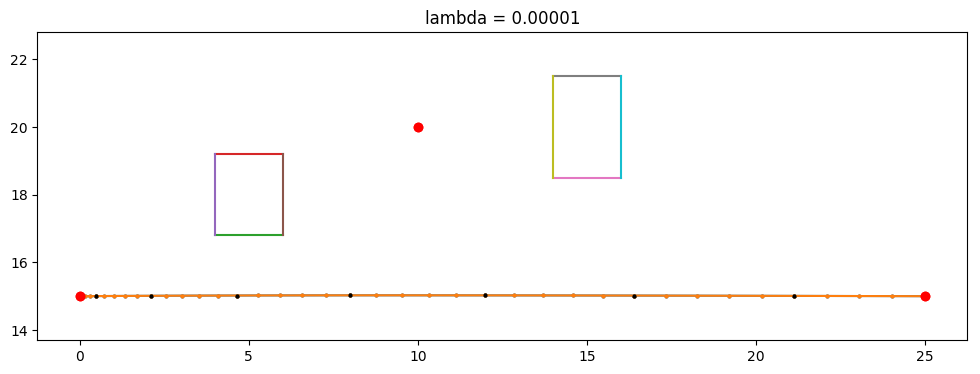

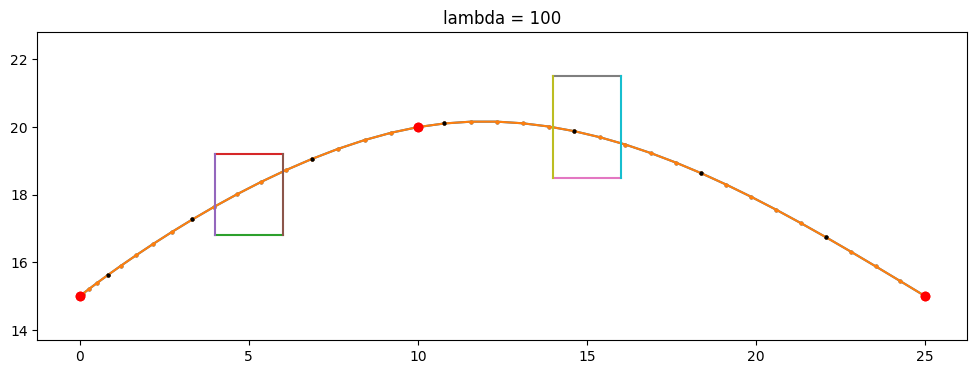

In [4]:
# Scenario 1: Hovercrafts do not have to avoid collision with any obstacle as well as each other

# 2 cases
# case 1: choosing very small lambda value
lambda = 0.00001
xopt_none, uopt_none, objectivevalue_none, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, false, false, lambda)

plotMazeSolution(xopt_none, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.00001")

# case 2: choosing large lambda value
lambda = 100
xopt_none, uopt_none, objectivevalue_none, j1, j2 =
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, false, false, lambda)
figure()
plotMazeSolution(xopt_none, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 100")
;

As expected, all the hovercrafts follow the same trajectory from start to end way point, minimizing the overall thrust and going right through the obstacles. In case of small lambda, the hovercrafts do not go anywhere close to the intermediate way points and go directly from start point to end point. Whereas when we choose a bigger value of lambda, all the hovercrafts take a smooth curve going through all the way points, going right through the obstacles.

### Scenario 2

In this scenario, we do not impose the collision avoidance on hovercrafts from each other but add the collision avoidance constraint for each of the hovercraft with all the obstacles. This means that the hovercrafts have to avoid collision with all the obstacles but not from each other while completing their trajectories. As done in Scenario 1, here also we have run this scenario for 2 different cases, with extremely small and a large value of lambda.

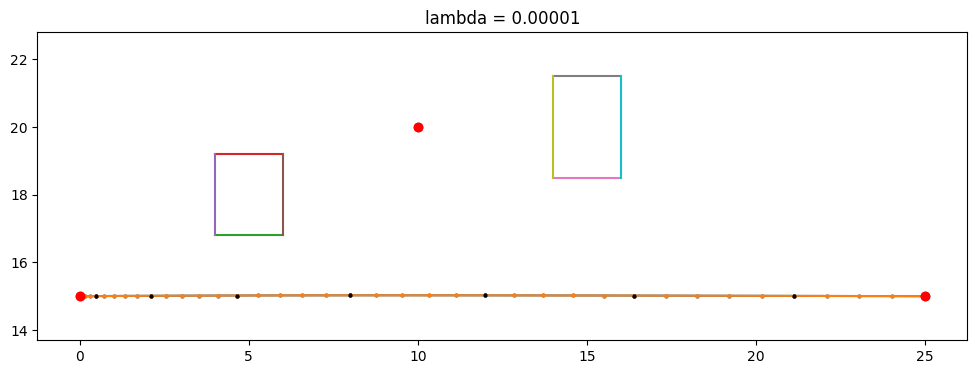

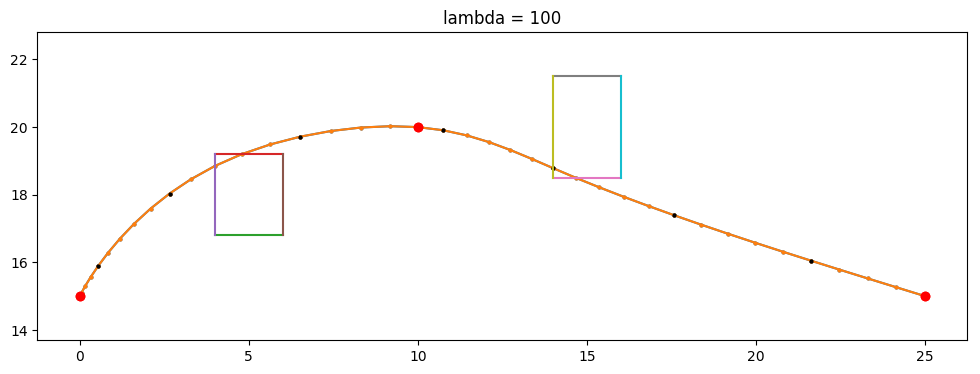

In [5]:
# Scenario 2: Hovercrafts have to avoid collision with all the static obstacles but not each other

# 2 cases
# case 1: choosing very small lambda value
lambda = 0.00001
xopt_none, uopt_none, objectivevalue_none, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, false, lambda)

plotMazeSolution(xopt_none, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.00001")

# case 2: choosing large lambda value
lambda = 100
xopt_none, uopt_none, objectivevalue_none, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, false, lambda)
figure()

plotMazeSolution(xopt_none, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 100")
;

As expected, all the hovercrafts again follow the same trajectory from start to end way point, minimizing the overall thrust and avoiding all the obstacles. In case of small lambda, the hovercrafts again do not go anywhere close to the intermediate way points and go directly from start point to end point. Whereas when we choose a bigger value of lambda, all the hovercrafts take a smooth curve going through all the way points avoiding all the obstacles.

One interesting thing to notice in the above figure is that the hovercrafts seem to touch the boundary of the obstcle through its edges. The trajectory points lie right on the edge of the obstacle. This is a valid trajectory since the boundary of the obstacle is a valid region for the hovercraft to be as the hovercraft cannot be inside the boundaries.

The small region of the trajectory which actually lies within the obstacle is due to numerical precision. If the Maximum velocity would have been smaller this jump wouldn't have been possible. Another solution would be to make the time steps even less spaced out, ie. time intervals of less than 1sec. 

### Scenario 3

In this scenario, we impose the collision avoidance on all hovercrafts, both from the obstacles and each other. This means that the hovercrafts have to avoid collision with all obstacles as well as each other while completing their trajectories. We ran this scenario for 2 different cases too, with extremely small and a large value of lambda.

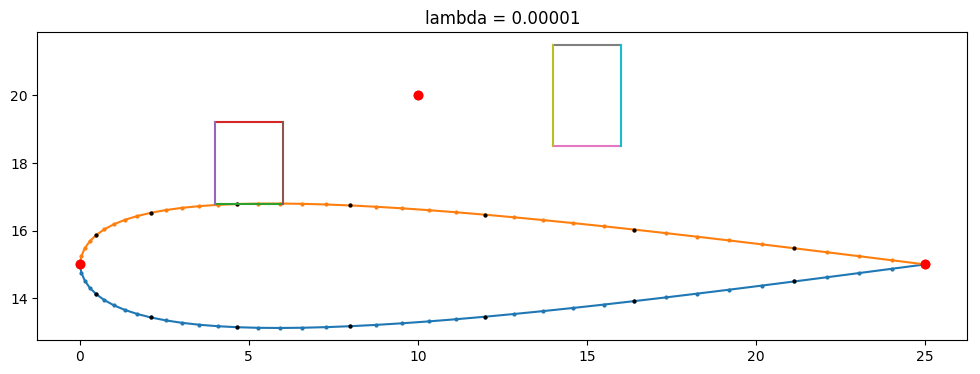

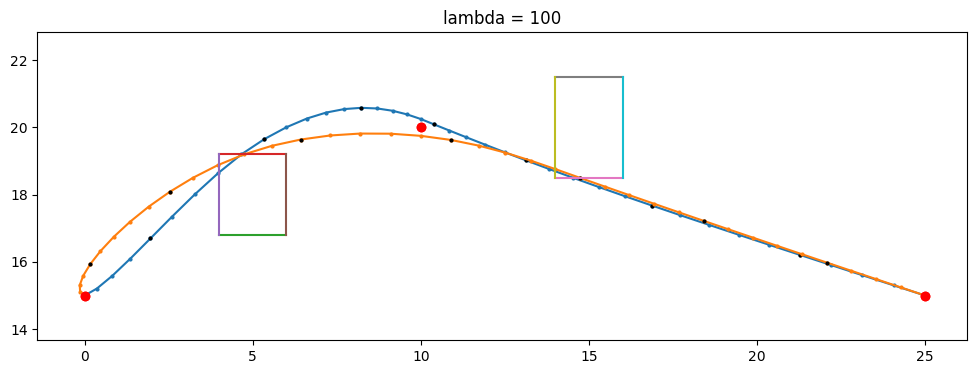

In [6]:
# Scenario 3: Hovercrafts have to avoid collision with all the obstacles as well as each other

# 2 cases
# case 1: choosing very small lambda value
lambda = 1/100000
xopt, uopt, objectivevalue, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)

plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.00001")


# case 2: choosing large lambda value
lambda = 100
xopt, uopt, objectivevalue, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
figure()
plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 100")
;

As can be seen above, the hovercrafts follow different trajectories avoiding each other and all the obstacles. In case of small lambda, again the hovercrafts again do not go anywhere close to the intermediate way points and go directly from start point to end point. Whereas when we choose a bigger value of lambda, they hovercrafts go through all the way points avoiding all the obstacles and each other.
Explanation for touching obstacles on the edges is same as explained in scenario 2.

An interesting thing to note is the difference in trajectory for small lamda value from the instance where collision avoidance was not added in the model to this situation. The hovercrafts in this situation tend to go away from each other initially to seperate themselves in space so that the rest of the trajectories don't have a chance to cross each other.

Another interesting thing to notice in the plot above is that, the trajectory for both hovercrafts after crossing second obstacle looks exactly the same. But as can be seen by the black dots marked on both the trajectory, the hovercrafts do visit the same locations but they are seperated in time. This ensures that the constraint on the model which stops two (or more) hovercrafts to be at the same location at same time is being met.

#### Pareto Optimal Curve

In this section, we plot the Pareto Optimal Curve for the 3rd scenario. We vary our regulairzation parameter(lambda) logarithmically between 0.00001 and 100, into 30 points. Then, we solve our maze problem with the above mentioned instance and parameters, avoiding collisions between all the hovercrafts as well as all the obstacles. Finally, we plot the trade-off curve between optimal fuel cost and waypoint mismatch for different values of the lambda.

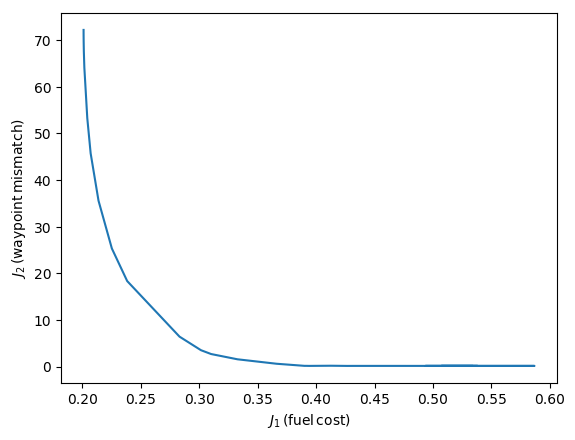

In [7]:
# Pareto Curve: Plotting Pareto Curve for 3rd scenario where every hovercraft has to 
# avoid collision with all the obstacles and each other.

Npts = 30

J1 = zeros(Npts)
J2 = zeros(Npts)

for (i,lambda) in enumerate(logspace(-5,2,Npts))
    xopt, uopt, objectivevalue, J1[i], J2[i] = 
    solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
end

figure()
plot(J1, J2)
xlabel(L"J_1\, (\sf fuel\, cost)");
ylabel(L"J_2\, (\sf waypoint\, mismatch)")
;

### Scaling

In this section we discuss how the model scales by making the problem instance more complex. To make the instance more complex we increase the number of hovercrafts, obstacles and waypoints. We do this for a fixed regularization parameter value of 0.1

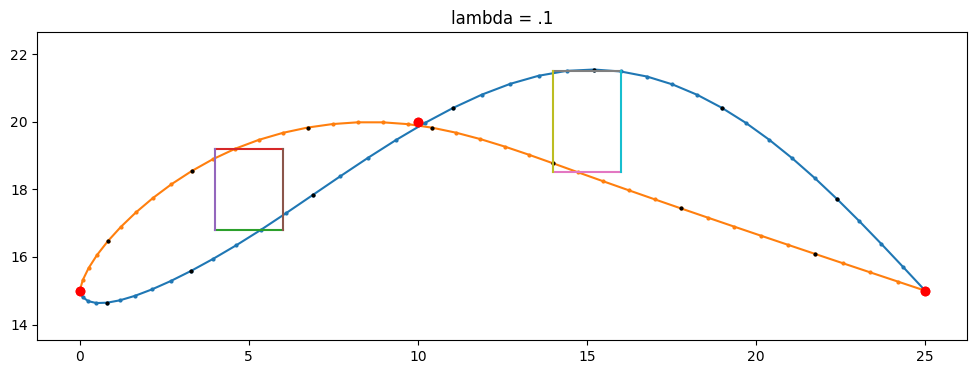

7.371150 seconds (73.19 k allocations: 5.039 MB)


In [8]:
# The grid solved above for all scenarios for reference with this value of lambda and the associated time
lambda = 0.1
@time xopt, uopt, objectivevalue, j1, j2 = 
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
figure()
plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = .1")

The problem instace has been made more complex by adding another hovercraft to the mix, while also increasing the number of obstacles in the path.

222.

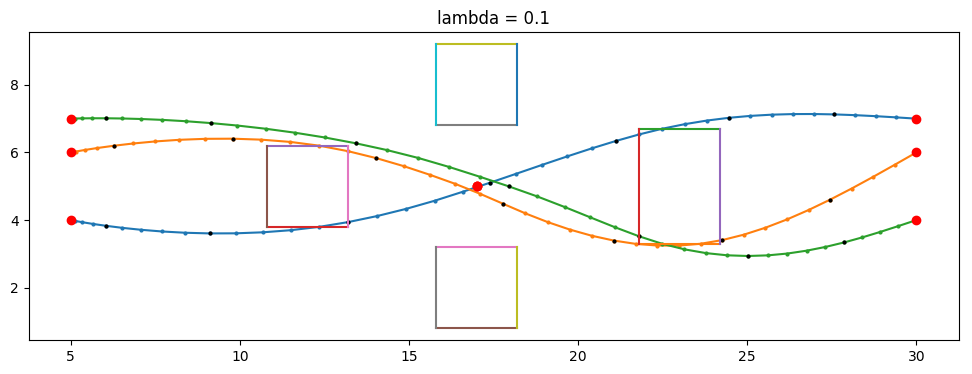

537174 seconds (177.38 k allocations: 11.809 MB)


In [9]:
lambda = 0.1

numHoverCrafts = 3
numObstacles = 4

inputWayPoints = zeros(2, numWayPoints, numHoverCrafts)
inputObstacles = zeros(2, numObstacles)
bbo = zeros(2, numObstacles)
bo = zeros(4, numObstacles)

inputWayPoints[:,:,1] = [5  17 30
                         4  5  7]

inputWayPoints[:,:,2] = [5  17 30
                         6  5  6]

inputWayPoints[:,:,3] = [5  17 30
                         7  5  4]
    
inputObstacles = [ 12  17  23  17
                   5   8    5   2]
    
bbo = [ 1.2  1.2 1.2  1.2
        1.2  1.2 1.7  1.2]

for i in 1:numObstacles
    bo[1,i] = inputObstacles[1,i] - bbo[1,i]
    bo[2,i] = -(inputObstacles[1,i] + bbo[1,i])
    bo[3,i] = inputObstacles[2,i] - bbo[2,i]
    bo[4,i] = -(inputObstacles[2,i] + bbo[2,i])
end

@time xopt, uopt, objectivevalue, j1, j2 =
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
figure()
plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.1")
;

__Result__: ~200 secs

The above situation is interesting when a swarm of hovercrafts start from different positions but have to go through a common waypoint. The model optimizes the trajectory in such a way that when waypoint is to be reached the hovercrafts group around it in a small circle such that the constraints are not violated and the model cost is as small as possible.

But as seen, the time to solve goes up drastically when the number of hovercrafts and obstacles are increased.

Taking the above reading as base, the following two problem instances, reduce the number of obstacles and number of hovercrafts respectively. This should give the measure by which these parameters solve the solve time of the model.

 49

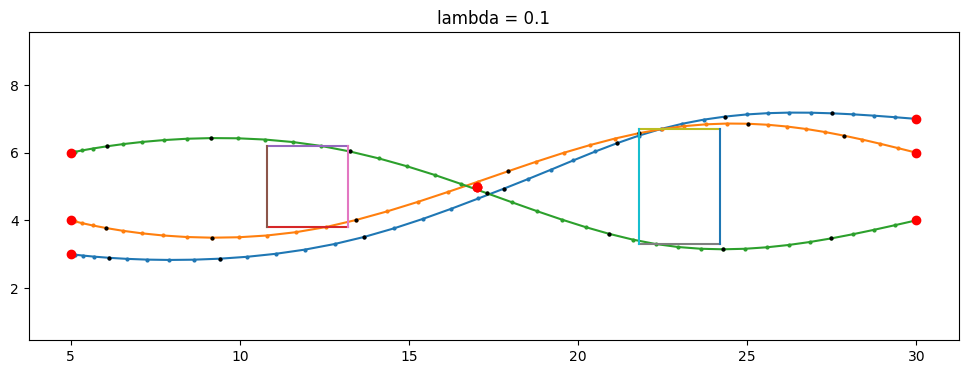

.186829 seconds (112.82 k allocations: 8.301 MB, 0.02% gc time)


In [10]:
lambda = 0.1

numWayPoints = 3
numHoverCrafts = 3
numObstacles = 2

inputWayPoints = zeros(2, numWayPoints, numHoverCrafts)
inputObstacles = zeros(2, numObstacles)
bbo = zeros(2, numObstacles)
bo = zeros(4, numObstacles)
T = zeros(Int,numWayPoints)

T[1] = 1
T[2] = 20
T[3] = 40

inputWayPoints[:,:,1] = [5  17 30
                         3  5  7]

inputWayPoints[:,:,2] = [5  17 30
                         4  5  6]

inputWayPoints[:,:,3] = [5  17 30
                         6  5  4]

inputObstacles = [ 12  23
                   5  5 ]
    
bbo = [ 1.2  1.2
        1.2  1.7]

for i in 1:numObstacles
    bo[1,i] = inputObstacles[1,i] - bbo[1,i]
    bo[2,i] = -(inputObstacles[1,i] + bbo[1,i])
    bo[3,i] = inputObstacles[2,i] - bbo[2,i]
    bo[4,i] = -(inputObstacles[2,i] + bbo[2,i])
end

@time xopt, uopt, objectivevalue, j1, j2 =
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
figure()
plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.1")
;

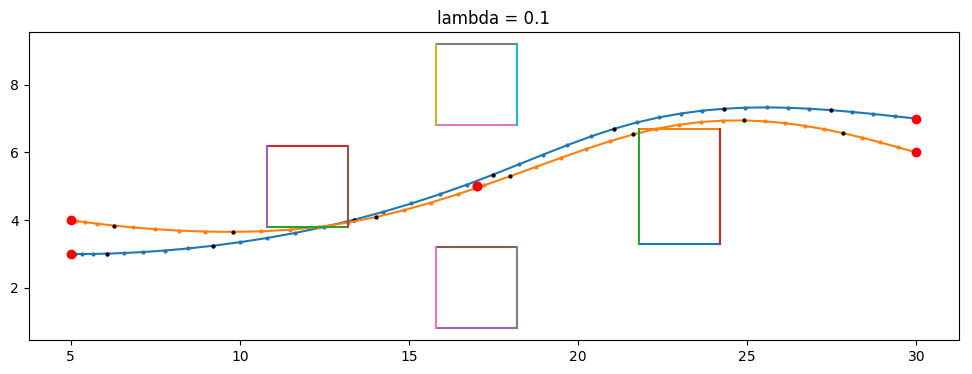

5.869761 seconds (116.25 k allocations: 7.592 MB)


In [11]:
lambda = 0.1

numWayPoints = 3
numHoverCrafts = 2
numObstacles = 4

inputWayPoints = zeros(2, numWayPoints, numHoverCrafts)
inputObstacles = zeros(2, numObstacles)
bbo = zeros(2, numObstacles)
bo = zeros(4, numObstacles)
T = zeros(Int,numWayPoints)

T[1] = 1
T[2] = 20
T[3] = 40

inputWayPoints[:,:,1] = [5  17 30
                         3  5  7]

inputWayPoints[:,:,2] = [5  17 30
                         4  5  6]

inputObstacles = [ 12  17  23  17
                   5   8    5   2]
    
bbo = [ 1.2  1.2 1.2  1.2
        1.2  1.2 1.7  1.2]

for i in 1:numObstacles
    bo[1,i] = inputObstacles[1,i] - bbo[1,i]
    bo[2,i] = -(inputObstacles[1,i] + bbo[1,i])
    bo[3,i] = inputObstacles[2,i] - bbo[2,i]
    bo[4,i] = -(inputObstacles[2,i] + bbo[2,i])
end

@time xopt, uopt, objectivevalue, j1, j2 =
solveMaze(numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, true, true, lambda)
figure()
plotMazeSolution(xopt, numWayPoints, numHoverCrafts, numObstacles, A, bo, inputWayPoints, inputObstacles)
title("lambda = 0.1")
;

As seen from the above two plots, bringing the hovercraft number down reduces the complexity of the model more drasticaly than bringing the number of obstacles down.

For reference, the time came down from ~200 secs to ~6 secs when one hovercraft was decreased and the number of obstacles remained the same.
While the time came down from ~200 secs to ~50 secs when two obstacles were reduced and the number of hovercrafts were kept the same.

This can be understood by the fact that adding another obstacle adds a linear number of constraints while adding a hovercraft adds a quadratic number of constraints. They are quadratic since, the constraints are added on all pairs of hovercrafts.

__Optimization__: To improve the scaling of the model while adding hovercrafts in the problem instance, we took advantage of the fact that all the hovercrafts are of the same size. This led to the fact that when the hovercrafts are of same size, the collision constraints for both of the hovercrafts will get violated together. So it was safe to add just one of them.

Instead if the hovercrafts are of different sizes, the smaller hovercraft will have itself in the bounding box of the bigger hovercarft but the bigger hovercraft's center might not be in the smaller hovercraft's bounding box. Hence both the collision avoidance constraints will not be violated, hence both were necessary and we can't remove half of them.

This optimization reduced the number of constraints in our model by half when a hovercraft is added. This also led to reducing the solve times of various complex problem instances.

## 5. Conclusion ##

In this report, we have tried to solve a close-to-real world scenario collision avoidance problem. For our model, we move the hovercrafts from a source node to an end node, crossing each intermediate checkpoint, avoiding collision with each other and any obstacle they found on their way. Our aim was to minimize the total thrust while trying to hit or go close by as many intermediate waypoints as possible.

In conclusion, we were able to solve the problem for a decent number of obstacle settings. Addition of hovercrafts to the problem made the instance more complex which was solvable if the number of hovercrafts were less than four. Above this limit it took in the order of hours to get an optimal trajectory.

As a follow up or future work, the project could change the dynamics of the hovercraft to become non-linear. We tried using the Ackerman-Car model$^{[2]}$, but were limited by the solvers. The solver wasn't able to solve the obstacle avoidance constraints with the non-linear model. Although both of them seperately work well.
If the direction is followed, projects such as autonomous parking of a car could be implemented. Motion planning of a car could take place in closed spaces with lot of other cars around.

Another direction which the project can take is to increase the dimensionality of the problem. The problem space can be increased from a 2D hovercraft to a 3D one. The obstacles then could help make more interesting situations.

Different size hovercrafts could be another avenue to look in, to simulate more accurately the real world scenarios. In our project to reduce the number of constraints which were imposed by collision avoidance, we took benefit of the fact that all the hovercrafts were of the same size ie. $1x1$ $unit^2$. This helped us reducing the constraints to half. On the other hand in real world situations, multiple types of robots can be used to build a swarm and thus this problem model could be enhanced to deal with it.

## 6. Appendix
1. http://www.mit.edu/people/jhow/Richards_SM.pdf
1. http://planning.cs.uiuc.edu/node658.html